# Pharmaceutical Supply Chain Inventory Optimization: Predicting Energy Consumption

## Business Overview/Problem

PharmaCorp faces a significant business challenge related to the optimization of its pharmaceutical supply chain inventory. The primary issues include:

 

A. Overproduction and Losses: PharmaCorp often produces medications in quantities that exceed market demand. This overproduction leads to substantial financial losses due to expired shelf-life and the need for disposal of unsold products.
 
B. Shelf Life Management: Managing the varying shelf lives of different pharmaceutical products is a complex task. Failure to sell products before their expiration date not only results in financial losses but also poses potential risks to patient safety.
 
C. Market Trends: The pharmaceutical industry is highly dynamic, with market trends and demand patterns constantly evolving. PharmaCorp struggles to align its production schedules with these ever-changing market dynamics.

D. Competitive Pressures: PharmaCorp faces intense competition from other pharmaceutical companies. Efficient inventory management is crucial to maintaining a competitive edge and optimizing costs.

### Rationale for the Project

Rationale for the Project
Supply Chain Inventory Optimization is the process of managing inventory levels in a supply chain to minimize costs while meeting customer demand. It is crucial in the pharmaceutical industry because of the perishable nature of drugs and the need to maintain a high level of quality control. The significance of initiating this project lies in several compelling reasons:

 
A. Cost Reduction: PharmaCorp incurs significant financial losses due to overproduction and inventory mismanagement. Optimizing inventory based on shelf life and market trends can lead to substantial cost reductions.
 
B. Enhanced Profitability: Reducing losses from overproduction and minimizing waste will directly impact PharmaCorp's profitability, allowing resources to be allocated more efficiently.
 
C. Competitive Advantage: Efficient inventory management will provide PharmaCorp with a competitive advantage by allowing the company to respond more effectively to market trends and customer demands.
 
D. Sustainability: Reducing overproduction and waste aligns with PharmaCorp's commitment to sustainability and responsible business practices.

### Aim of the Project

The project aims to achieve the following objectives:

 
 - Reduce Overproduction: Implement an inventory optimization strategy that significantly reduces overproduction of pharmaceutical products.
 
- Minimize Losses: Minimize financial losses associated with expired products by aligning inventory with shelf life.

 
- Improve Forecasting: Enhance demand forecasting accuracy by incorporating market trends and historical sales data.

### Data Description

The dataset available from the company contains the following information:

 

- Product ID: Product unique identifier, for each product.

- Shelf Life Days: Shelf life of the pharmaceutical product in days.

- Sales 2021: Total number of sales of that product in 2021.

- Sales 2022: Total number of sales of that product in 2022.

- Market Trend Factor: An index that measures factors like market trends, consumer preferences, competitor actions, and other external factors.

- Compliance Status: This is an indication of whether or not a drug is compliant with regulation. Can be either of two things ‘Compliant’ or ‘Non-compliant’.


### Tools

###### Programming Language
- Python

###### Libraries and Packages 

- Pandas

- NumPy

###### Data Visualization
- Matplotlib

- Seaborn

###### Machine Learning:

- Scikit-learn (Sklearn)

- DecisionTreeRegressor

- LabelEncoder

- Metrics (mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

### 1. Import Packages

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (mean_absolute_error, 
                             mean_absolute_percentage_error,
                             mean_squared_error)

import warnings
warnings.filterwarnings('ignore')


## 2. Data Exploration and preprocessing


In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location
0,Product_1,277,602.6,545,0.906303,Compliant,Supplier_2,Location_B,Category_B,22,Warehouse_C
1,Product_2,343,359.4,345,0.972500,Compliant,Supplier_1,Location_C,Category_C,24,Warehouse_C
2,Product_3,291,983.0,915,1.026074,Non-compliant,Supplier_5,Location_C,Category_A,24,Warehouse_B
3,Product_4,298,789.4,751,0.911503,Compliant,Supplier_8,Location_C,Category_A,20,Warehouse_B
4,Product_5,260,326.8,430,1.052617,Compliant,Supplier_10,Location_A,Category_B,21,Warehouse_A


In [4]:
df.isnull().sum()

Product_ID                0
Shelf_Life_Days           0
Sales_2021                0
Sales_2022                0
Market_Trend_Factor       0
Compliance_Status         0
Supplier_ID               0
Manufacturing_Location    0
Product_Category          0
Safety_Stock_Days         0
Storage_Location          0
dtype: int64

In [5]:
df.describe()

,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Safety_Stock_Days
count,19381.000000,19381.000000,19381.000000,19381.000000,19381.000000
mean,301.737939,618.423250,618.798256,0.999851,21.327073
std,25.576353,239.313199,220.590729,0.257548,7.090764
min,260.000000,80.000000,234.000000,0.078110,6.000000
25%,278.000000,429.000000,429.000000,0.823775,16.000000
50%,302.000000,619.200000,621.000000,1.000239,21.000000
75%,326.000000,811.200000,809.000000,1.175179,27.000000
max,344.000000,1155.400000,999.000000,1.909161,42.000000


In [6]:
df.duplicated().all()

False

### 2.2 Bivariate Analysis

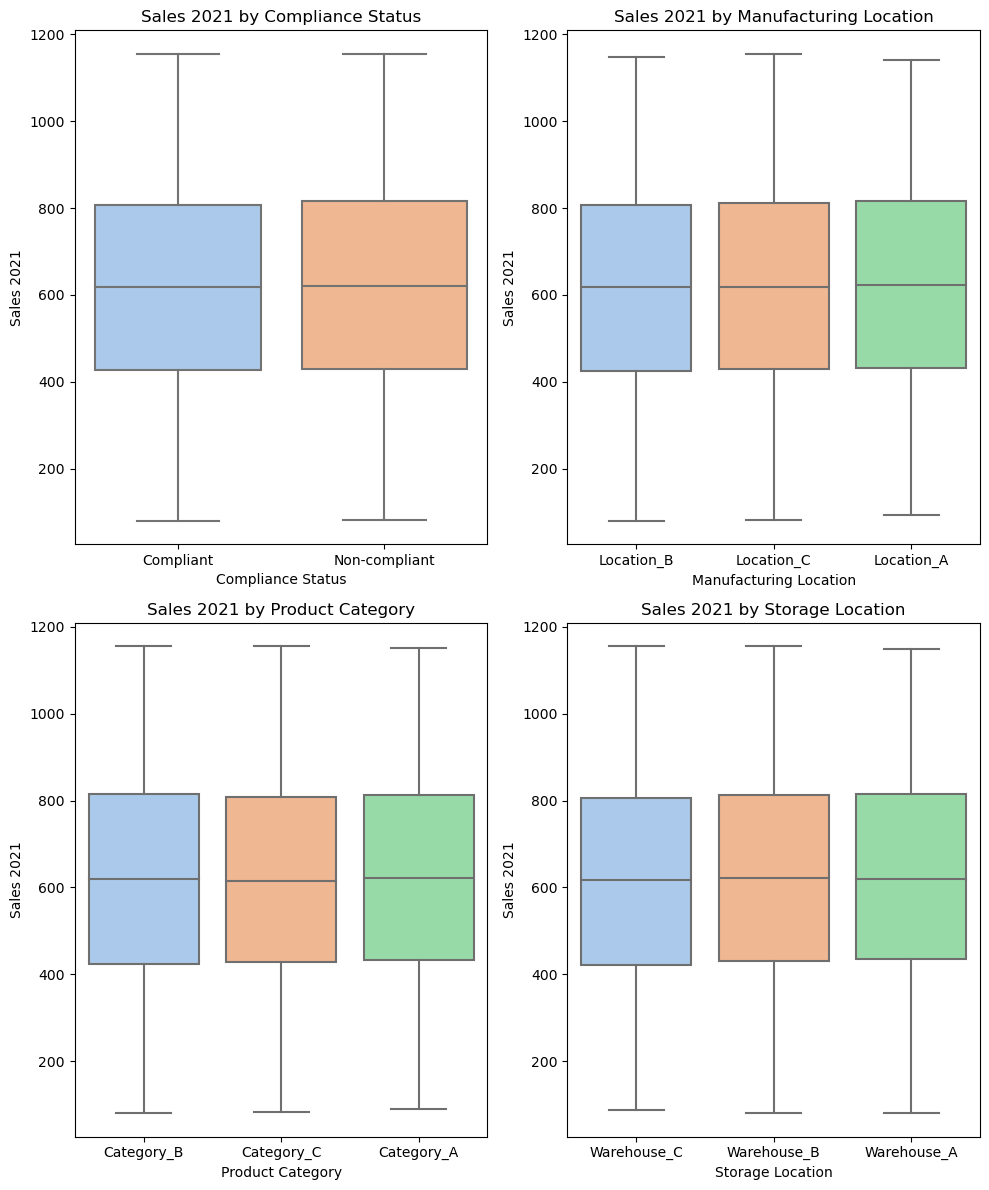

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(10, 12))

# Sales 2021 against Compliance Status
sns.boxplot(data=df, x='Compliance_Status', y='Sales_2021', ax=ax[0, 0], palette='pastel') 
ax[0, 0].set_title('Sales 2021 by Compliance Status')
ax[0, 0].set_xlabel('Compliance Status')
ax[0, 0].set_ylabel('Sales 2021')

# Sales 2021 against Manufacturing Location
sns.boxplot(data=df, x='Manufacturing_Location', y='Sales_2021', ax=ax[0, 1], palette='pastel')
ax[0, 1].set_title('Sales 2021 by Manufacturing Location')
ax[0, 1].set_xlabel('Manufacturing Location')
ax[0, 1].set_ylabel('Sales 2021')

# Sales 2021 against Product Category
sns.boxplot(data=df, x='Product_Category', y='Sales_2021', ax=ax[1, 0], palette='pastel')
ax[1, 0].set_title('Sales 2021 by Product Category')
ax[1, 0].set_xlabel('Product Category')
ax[1, 0].set_ylabel('Sales 2021')

# Sales 2021 against Storage Location
sns.boxplot(data=df, x='Storage_Location', y='Sales_2021', ax=ax[1, 1], palette='pastel')
ax[1, 1].set_title('Sales 2021 by Storage Location')
ax[1, 1].set_xlabel('Storage Location')
ax[1, 1].set_ylabel('Sales 2021')

plt.tight_layout()
plt.show()


##### 2.2.1 Sales 2022 against Categorical Variables


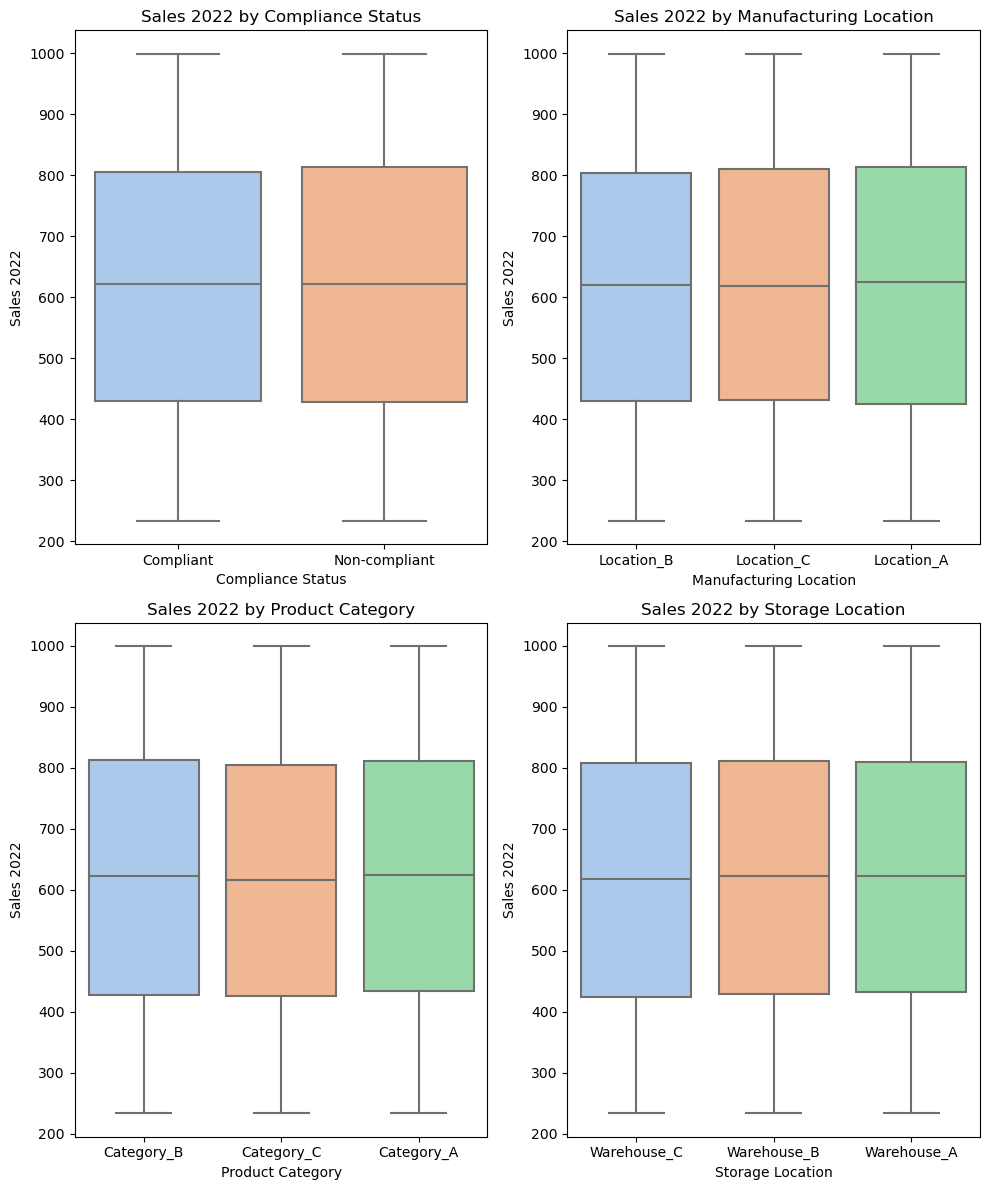

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(10, 12))

# Sales 2022 against Compliance Status
sns.boxplot(data=df, x='Compliance_Status', y='Sales_2022', ax=ax[0, 0], palette='pastel') 
ax[0, 0].set_title('Sales 2022 by Compliance Status')
ax[0, 0].set_xlabel('Compliance Status')
ax[0, 0].set_ylabel('Sales 2022')

# Sales 2022 against Manufacturing Location
sns.boxplot(data=df, x='Manufacturing_Location', y='Sales_2022', ax=ax[0, 1], palette='pastel')
ax[0, 1].set_title('Sales 2022 by Manufacturing Location')
ax[0, 1].set_xlabel('Manufacturing Location')
ax[0, 1].set_ylabel('Sales 2022')

# Sales 2022 against Product Category
sns.boxplot(data=df, x='Product_Category', y='Sales_2022', ax=ax[1, 0], palette='pastel')
ax[1, 0].set_title('Sales 2022 by Product Category')
ax[1, 0].set_xlabel('Product Category')
ax[1, 0].set_ylabel('Sales 2022')

# Sales 2022 against Storage Location
sns.boxplot(data=df, x='Storage_Location', y='Sales_2022', ax=ax[1, 1], palette='pastel')
ax[1, 1].set_title('Sales 2022 by Storage Location')
ax[1, 1].set_xlabel('Storage Location')
ax[1, 1].set_ylabel('Sales 2022')

plt.tight_layout()
plt.show()


##### 2.2.2 Bivariariate Analysis: sales against Numerical Variables

Sales against "Shelf_life_Days" and Market_Trend_Factor

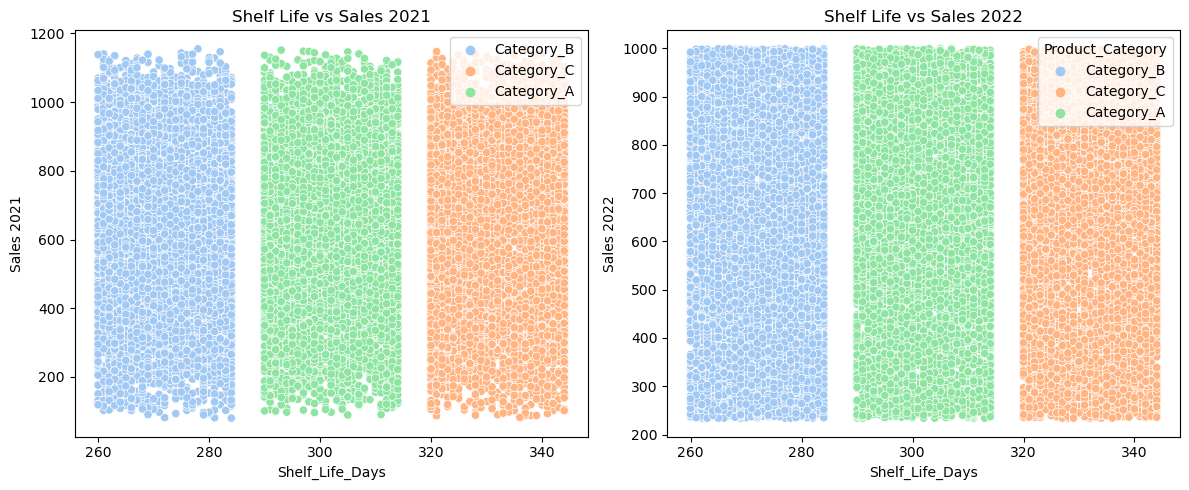

In [9]:
fig, ax = plt.subplots(1, 2, figsize= (12, 5))

# shelf life Days against Sales 2021
sns.scatterplot(data=df, x='Shelf_Life_Days', y='Sales_2021', ax=ax[0], hue= 'Product_Category', palette='pastel') 
ax[0].set_title('Shelf Life vs Sales 2021')
ax[0].set_xlabel('Shelf_Life_Days')
ax[0].set_ylabel('Sales 2021')
ax[0].legend(loc = 'upper right')


# shelf life Days against Sales 2022
sns.scatterplot(data=df, x='Shelf_Life_Days', y='Sales_2022', ax=ax[1], hue = 'Product_Category', palette='pastel') 
ax[1].set_title('Shelf Life vs Sales 2022')
ax[1].set_xlabel('Shelf_Life_Days')
ax[1].set_ylabel('Sales 2022')
ax[0].legend(loc = 'upper right')

plt.tight_layout()
plt.show()


Next Plot for Sales_2021, Sales_2022, Market_Trend_Factor

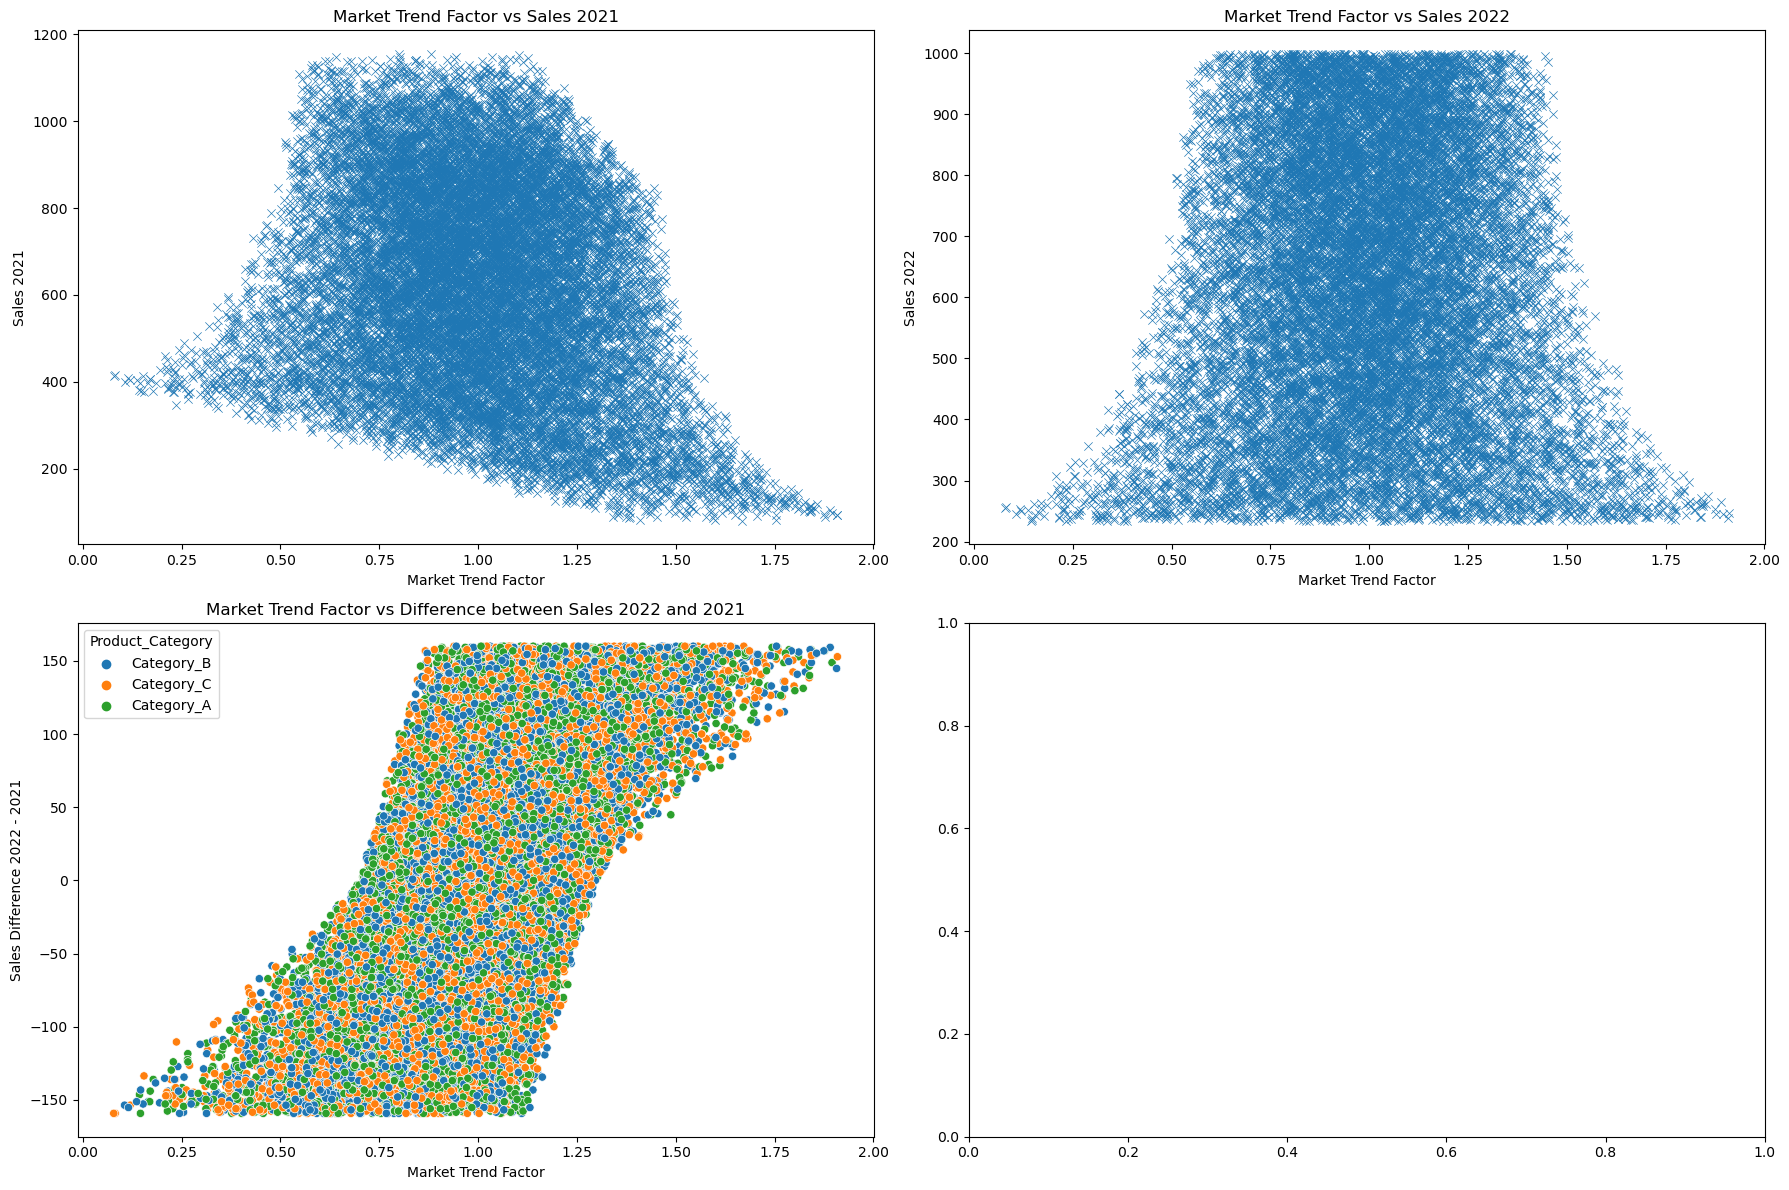

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Market Trend Factor against Sales 2021
sns.scatterplot(data=df, x='Market_Trend_Factor', y='Sales_2021', ax=ax[0, 0], marker='x')
ax[0, 0].set_title('Market Trend Factor vs Sales 2021')
ax[0, 0].set_xlabel('Market Trend Factor')
ax[0, 0].set_ylabel('Sales 2021')

# Market Trend Factor against Sales 2022
sns.scatterplot(data=df, x='Market_Trend_Factor', y='Sales_2022', ax=ax[0, 1], marker='x')
ax[0, 1].set_title('Market Trend Factor vs Sales 2022')
ax[0, 1].set_xlabel('Market Trend Factor')
ax[0, 1].set_ylabel('Sales 2022')

# Market Trend Factor against difference between sales 2022 and 2021
df['Sales_2022-sales_2021'] = df['Sales_2022'] - df['Sales_2021']
sns.scatterplot(data=df, x='Market_Trend_Factor', y='Sales_2022-sales_2021', ax=ax[1, 0], hue='Product_Category')
ax[1, 0].set_title('Market Trend Factor vs Difference between Sales 2022 and 2021')
ax[1, 0].set_xlabel('Market Trend Factor')
ax[1, 0].set_ylabel('Sales Difference 2022 - 2021')

plt.tight_layout()
plt.show()


#### Bivariate Analysis: Sales for 2021 and 2022

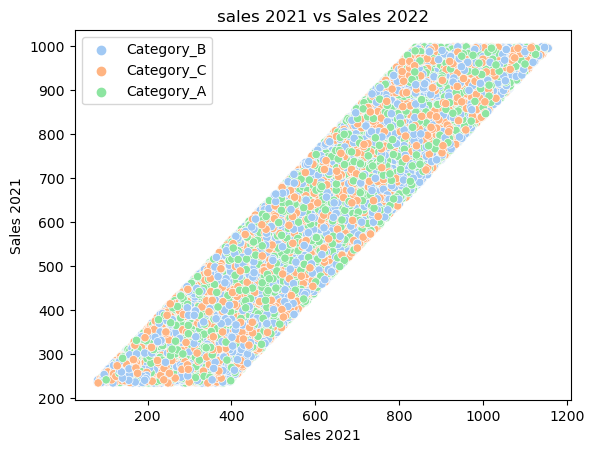

In [11]:
sns.scatterplot(data=df, x='Sales_2021', y='Sales_2022', hue= 'Product_Category', palette='pastel')
plt.title('sales 2021 vs Sales 2022')
plt.xlabel('Sales 2021')
plt.ylabel('Sales 2021')
plt.legend(loc='upper left')
plt.show()

This is a positive correlation

#### Bivariate Analysis: Other pairs of variables

Product_Category against
- 'Market_Trend_Days',
- 'Safety_StockDays'

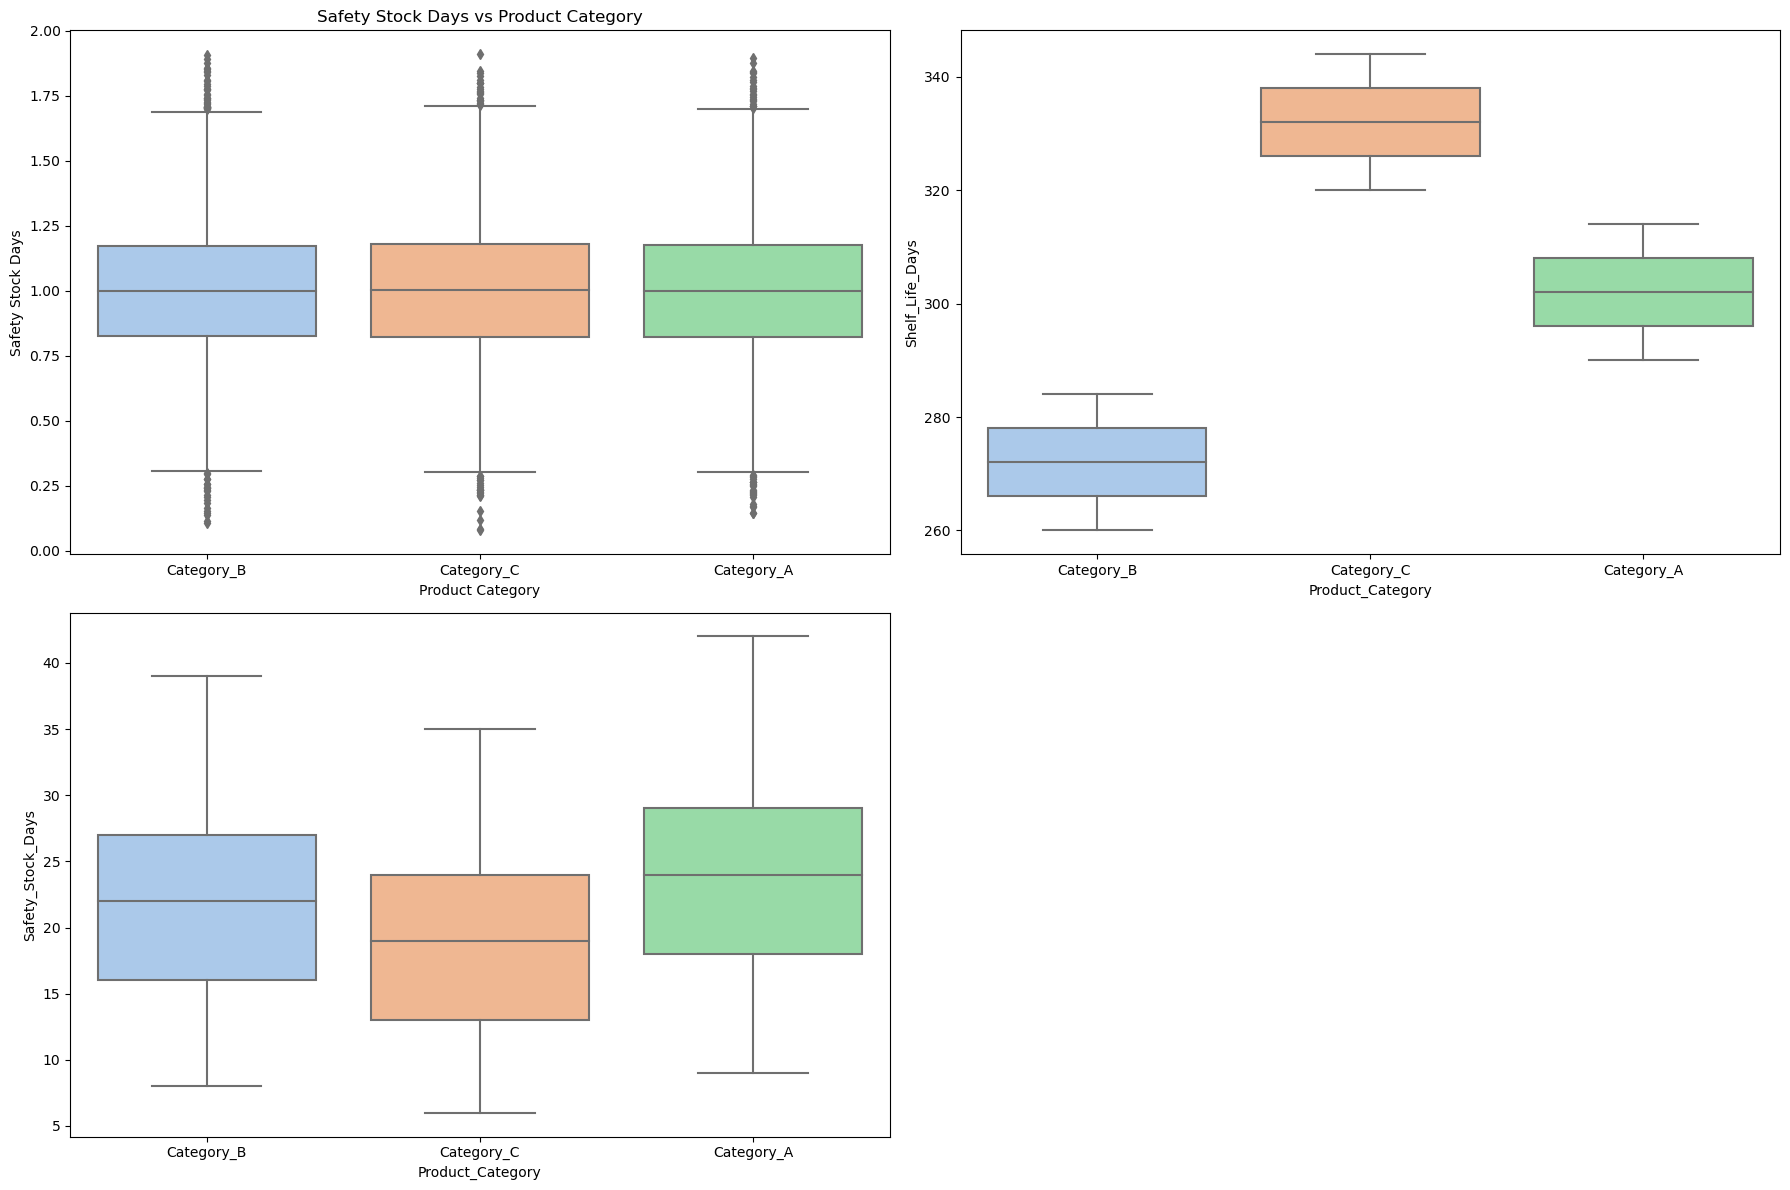

In [12]:
fig, ax = plt.subplots(2,2, figsize=(18, 12))

# Market Trend Factor and Product Category
sns.boxplot(data=df, x='Product_Category', y='Market_Trend_Factor', ax=ax[0,0], palette= 'pastel')
ax[0,0].set_title('Market Trend Factor vs Product Category')
ax[0,0].set_xlabel('Product Category')
ax[0,0].set_ylabel('Market Trend Factor')


# Shelf Life days and Product Category
sns.boxplot(data=df, x='Product_Category', y='Shelf_Life_Days', ax=ax[0,1], palette= 'pastel')
ax[0,0].set_title('Shelf Life Days vs Product Category')
ax[0,0].set_xlabel('Product Category')
ax[0,0].set_ylabel('Shelf Life Days')


# Safety Stock Days and Product Category
sns.boxplot(data=df, x='Product_Category', y='Safety_Stock_Days', ax=ax[1,0], palette= 'pastel')
ax[0,0].set_title('Safety Stock Days vs Product Category')
ax[0,0].set_xlabel('Product Category')
ax[0,0].set_ylabel('Safety Stock Days')

ax[1,1].remove()

plt.tight_layout()
plt.show()


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19381 entries, 0 to 19380
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Product_ID              19381 non-null  object 
 1   Shelf_Life_Days         19381 non-null  int64  
 2   Sales_2021              19381 non-null  float64
 3   Sales_2022              19381 non-null  int64  
 4   Market_Trend_Factor     19381 non-null  float64
 5   Compliance_Status       19381 non-null  object 
 6   Supplier_ID             19381 non-null  object 
 7   Manufacturing_Location  19381 non-null  object 
 8   Product_Category        19381 non-null  object 
 9   Safety_Stock_Days       19381 non-null  int64  
 10  Storage_Location        19381 non-null  object 
 11  Sales_2022-sales_2021   19381 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


### 3. Demand Forecasting and Inventory Optimization
-Using 'Market_Trend_Factor' and Sales_2022
#### 3.1 Demnd Forecasting and Inventory Optimization; Using Market trend Factor

Market_Trend_Factor' and Sales_2022

#### Feature Engineering

In [14]:
df_mtf = df.copy()

df_mtf['Projected_Sales_2023'] = df_mtf['Sales_2022'] * df_mtf['Market_Trend_Factor']
df_mtf['Projected_Sales_2023'] = df_mtf['Projected_Sales_2023'].apply(lambda x: x if x >=0 else 0)

#### Encoding The Categorical Variables

In [15]:
from sklearn.preprocessing import LabelEncoder



# Columns to encode
cols = ['Compliance_Status', 'Supplier_ID', 'Manufacturing_Location', 'Product_Category', 'Storage_Location']

# Label encoding
label_encoder = {}

for column in cols:
    le = LabelEncoder()
    df_mtf[column] = le.fit_transform(df_mtf[column])
    label_encoder[column] = le

In [16]:
df_mtf.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location,Sales_2022-sales_2021,Projected_Sales_2023
0,Product_1,277,602.6,545,0.906303,0,2,1,1,22,2,-57.6,493.935278
1,Product_2,343,359.4,345,0.972500,0,0,2,2,24,2,-14.4,335.512507
2,Product_3,291,983.0,915,1.026074,1,5,2,0,24,1,-68.0,938.857721
3,Product_4,298,789.4,751,0.911503,0,8,2,0,20,1,-38.4,684.538694
4,Product_5,260,326.8,430,1.052617,0,1,0,1,21,0,103.2,452.625369


#### 3.1.2 Prepare X and Y data

In [17]:
# Splitting into features and target
x = df_mtf.drop(columns=['Product_ID', 'Projected_Sales_2023'])
y = df_mtf['Projected_Sales_2023']

In [18]:
from sklearn.model_selection import train_test_split

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [19]:
# Initialize and train the model
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100


print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)

MAE: 6.221055387690978
RMSE: 70.98980614116753
MAPE: 1.1952156870085173


##### 3.1.3  Inventory Optimization

Get average daily sales

In [20]:
df_mtf['Average_Daily_Sales'] = (df_mtf['Sales_2021'] + df_mtf['Sales_2022']) / (2 * 365)


##### Get Safety Stock 

In [21]:
df_mtf['Safety_Stock'] = df_mtf['Safety_Stock_Days'] * df_mtf['Average_Daily_Sales']

##### Optimal Inventory For 2023

In [22]:
df_mtf['Optimal_Inventory_2023'] = df_mtf['Projected_Sales_2023'] + df_mtf['Safety_Stock']

##### Including Shelf Life In Our Estimation

In [23]:
df_mtf['Optimal_Inventory_2023'] = df_mtf.apply(lambda row: min(row['Optimal_Inventory_2023'],
                                                               row['Shelf_Life_Days'] * row['Average_Daily_Sales']), axis=1)

### 3.2. Demand Forecasting And I nventory Optimization: Linear Projection

##### 3.2.1 Feature Engineering

Generally, the formula is: $y = y_0 + Slope * (x_1 -x_0 )$
 
 $x = YEAR, y = SALES$ 
 
 
 Generally, Slope is : $Slope = \frac{y_1 - y_0}{x_1-x_0}$
 
 So, for our usecase:
 
$Projected\_Sales\_2023 = Sales\_2021 + Slope = (2023 - 2021)$



In [27]:
df_lp = df.copy()

slope = df_lp['Sales_2022'] - df_lp['Sales_2021']

df_lp['Projected_Sales_2023'] = df_lp['Sales_2021'] + 2 * slope

df_lp['Projected_Sales_2023'] = df_lp['Projected_Sales_2023'].apply(lambda x: x if x >= 0 else 0)


Encode the bcategorical variables 

In [28]:
cols = ['Compliance_Status',
       'Supplier_ID',
        'Manufacturing_Location',
        'Product_Category',
        'Storage_Location']

label_encoders = {}

for column in cols:
    le = LabelEncoder()
    df_lp[column] = le.fit_transform(df_lp[column])
    label_encoders[column] = le

In [29]:
df_lp.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location,Sales_2022-sales_2021,Projected_Sales_2023
0,Product_1,277,602.6,545,0.906303,0,2,1,1,22,2,-57.6,487.4
1,Product_2,343,359.4,345,0.972500,0,0,2,2,24,2,-14.4,330.6
2,Product_3,291,983.0,915,1.026074,1,5,2,0,24,1,-68.0,847.0
3,Product_4,298,789.4,751,0.911503,0,8,2,0,20,1,-38.4,712.6
4,Product_5,260,326.8,430,1.052617,0,1,0,1,21,0,103.2,533.2


In [31]:
x = df_lp.drop(columns=['Product_ID', 'Projected_Sales_2023'])
y = df_lp['Projected_Sales_2023']

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=42
)


## 3.2.2 Demand Forecasting

#### Build the model.

In [34]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100


print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)

MAE: 4.609733447979364
RMSE: 5.928638395485055
MAPE: 0.9320903139629664


### 3.2.3. Inventory Optimization

Get Average Daily Sales

In [35]:
df_lp['Average_Daily_Sales'] = (df_lp['Sales_2021'] + df_lp['Sales_2022']) / (2 * 365)

Get The Safety Stock

In [36]:
df_lp['Safety_Stock'] = df_lp['Safety_Stock_Days'] * df_lp['Average_Daily_Sales']

Optimal Inventory for 2023

In [37]:
df_lp['Optimal_Inventory_2023'] = df_lp['Projected_Sales_2023'] + df_lp['Safety_Stock']

Adjust this value to account for shelf life 


In [39]:
df_lp['Optimal_Inventory_2023'] = df_lp.apply(lambda row: row['Shelf_Life_Days'] * row['Average_Daily_Sales'], axis=1)


### 4. Conclusion

Results form Market Trend factor and Sales 2022

In [40]:
df_mtf[['Product_ID', 'Projected_Sales_2023', 'Safety_Stock', 'Optimal_Inventory_2023']]. head()

,Product_ID,Projected_Sales_2023,Safety_Stock,Optimal_Inventory_2023
0,Product_1,493.935278,34.585205,435.459178
1,Product_2,335.512507,23.158356,330.971507
2,Product_3,938.857721,62.400000,756.600000
3,Product_4,684.538694,42.202740,628.820822
4,Product_5,452.625369,21.770959,269.545205


Result from Linear PRojection: Sales 2021 and Sales 2022
    
    

In [41]:
df_lp[['Product_ID', 'Projected_Sales_2023', 'Safety_Stock', 'Optimal_Inventory_2023']]. head()

,Product_ID,Projected_Sales_2023,Safety_Stock,Optimal_Inventory_2023
0,Product_1,487.4,34.585205,435.459178
1,Product_2,330.6,23.158356,330.971507
2,Product_3,847.0,62.400000,756.600000
3,Product_4,712.6,42.202740,628.820822
4,Product_5,533.2,21.770959,269.545205


In [46]:
from sklearn.metrics import mean_squared_error

columns = ['Projected_Sales_2023', 'Optimal_Inventory_2023']

errors = dict()

for col in columns:
    mtf, lp = df_mtf[col], df_lp[col]
    
    mae = mean_absolute_error(mtf, lp)
    rmse = mean_squared_error(mtf, lp,)  # Correcting RMSE calculation
    mape = mean_absolute_percentage_error(mtf, lp) * 100
    
    errors[col] = [mae, rmse, mape]

pd.DataFrame(errors, index=['MAE', 'RMSE', 'MAPE'])



,Projected_Sales_2023,Optimal_Inventory_2023
MAE,92.516408,21.767899
RMSE,12873.965456,3190.923775
MAPE,16.661423,7.636946


### 5. Recommendations

1. Implement an Advanced Predictive Analytics System
Action: Adopt a state-of-the-art predictive analytics system that leverages machine learning models to forecast demand accurately.
Benefit: This will enable PharmaCorp to anticipate market demand more effectively, reduce overproduction, and minimize the risk of stockouts, leading to more efficient inventory management.

2. Develop a Dynamic Shelf Life Management Program
Action: Create a dynamic shelf life management program using real-time tracking technologies such as RFID and IoT sensors.
Benefit: This program will help PharmaCorp monitor the expiration dates of products more closely, prioritize the sale of near-expiry items, and reduce financial losses due to expired inventory.

3. Enhance Supplier Collaboration and Integration
Action: Establish stronger collaboration and data integration with suppliers to synchronize supply chain activities.
Benefit: Improved communication and data sharing with suppliers can lead to better alignment of production schedules, reduced lead times, and more responsive supply chain operations, ensuring that inventory levels are optimized.

4. Adopt Lean Inventory Management Practices
Action: Implement lean inventory management practices, such as Just-In-Time (JIT) inventory and continuous improvement (Kaizen) processes.
Benefit: These practices will help PharmaCorp reduce excess inventory, lower carrying costs, and enhance operational efficiency by ensuring that inventory levels are closely aligned with actual demand.

5. Invest in Employee Training and Development
Action: Provide ongoing training and development programs for the supply chain management team on the latest inventory optimization techniques and tools.
Benefit: A well-trained team will be better equipped to make data-driven decisions, utilize advanced analytics tools effectively, and continuously improve inventory management processes, leading to enhanced performance and productivity.